In [1]:
# gradient descent implementation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# make fake data
input_data = 2 * np.random.rand(100,1)
output_data = 4 + 3*(input_data) + np.random.rand(100,1)

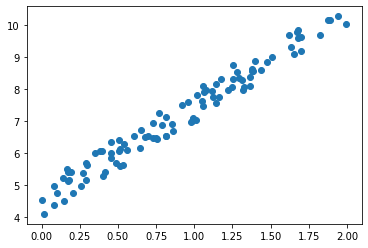

In [76]:
plt.plot(input_data, output_data, 'o')

In [70]:
# batch gradient descent
def gradient_desc(x, y, alpha, max_iters=10000):
    m = x.shape[0] # gives number of training samples
    iter = 0
    error_threshold = 0.001
    
    # initialize theta (choosing randomly first b/c algorithm will update theta)
    t0 = 0
    t1 = 0
    
    # summation of the loss - cost function J(theta)
    cost = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # performing convergence
    for iter in range(max_iters):
    
        # gradients for J(0) and J(1)
        grad0 = (1.0/m) * sum([(t0 + t1*x[i] - y[i]) for i in range(m)])
        grad1 = (1.0/m) * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
        
        # update thetas
        temp_t0 = t0 - alpha * grad0
        temp_t1 = t1 - alpha * grad1
        t0 = temp_t0
        t1 = temp_t1
        
        # squared error
        error = sum([(t0 + t1*x[i] -y[i])**2 for i in range(m)]) 
                              
        if abs(cost-error) <= error_threshold:
            print("Converged, iterations: ", iter)
            break
        
        cost = error # update cost
        
    return t0, t1, cost

In [72]:
print("input_data.shape = %s output_data.shape %s" % (input_data.shape,output_data.shape))

x = input_data
y = output_data
alpha = 0.03 # learning rate

# call gradient descent
theta0, theta1, cost = gradient_desc(x, y, alpha, max_iters=1000)
print ("theta0 = %s theta1 = %s cost = %s" % (theta0, theta1, cost))

input_data.shape = (100, 1) output_data.shape (100, 1)
Converged, iterations:  615
theta0 = [4.45858068] theta1 = [2.9953081] cost = [8.42906804]


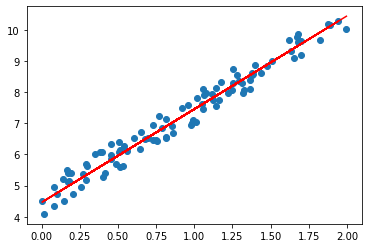

In [73]:
for i in range(x.shape[0]):
    y_predict = theta0 + theta1*x
plt.plot(x, y, 'o')
plt.plot(x, y_predict, 'r-')

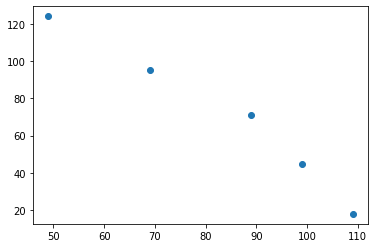

In [226]:
# example 2
# Y = XA + E - least squeares method with matrix mult.
x = np.array([49,69,89,99,109])
y = np.array([124, 95, 71, 45, 18])
plt.plot(x,y,'o')

In [227]:
m = x.shape[0]
X = np.zeros((m,2))
Y = np.zeros((m,1))
theta = np.zeros((2,1))
for i in range(m):
    X[i,0] = 1
    X[i,1] = x[i]
    Y[i] = y[i]
print(X)
print(Y)

[[1.0 49.0]
 [1.0 69.0]
 [1.0 89.0]
 [1.0 99.0]
 [1.0 109.0]]
[[124.0]
 [95.0]
 [71.0]
 [45.0]
 [18.0]]


In [228]:
# A = (X^t*X)^-1 * (X.T*Y)
np.set_printoptions(formatter={'float': lambda x: "{0:0.01f}".format(x)})
temp0 = np.linalg.inv(np.dot(X.T,X))
temp1 = np.dot(X.T,Y)
theta = np.dot(temp0,temp1)
theta
# h = -1.7x + 211

array([[211.3],
       [-1.7]])

The cost J = sum squared error = 205.138
[[128.2]
 [94.3]
 [60.4]
 [43.5]
 [26.5]]
[[124.0]
 [95.0]
 [71.0]
 [45.0]
 [18.0]]


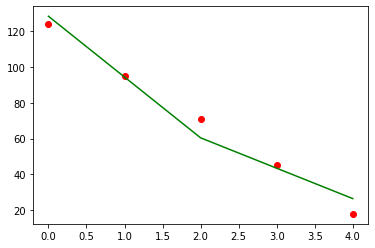

In [235]:
predicted_y = np.dot(X,theta)
temp0 = Y - predicted_y
cost = np.dot(temp0.T, temp0)
print(f'The cost J = sum squared error = {cost[0,0]:.3f}') 
print(predicted_y)
print(Y)
plt.plot(Y, 'ro')
plt.plot(predicted_y, 'g-')